In [1]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # Small constant to avoid log(0)
    cost = -1/m * (np.dot(y, np.log(h + epsilon)) + np.dot(1 - y, np.log(1 - h + epsilon)))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        
        # Save the cost at every iteration
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
    return theta, cost_history

# Prediction function
def predict(X, theta):
    probability = sigmoid(np.dot(X, theta))
    return [1 if p >= 0.5 else 0 for p in probability]


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept term to X
X_scaled = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
# Initialize parameters
theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
num_iterations = 10000

# Train the model using gradient descent
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

print(f'Final Parameters: {theta_final}')


Final Parameters: [ 0.45980648 -0.54629196 -0.65757191 -0.52401221 -0.57750173 -0.20210881
  0.16147687 -0.63265641 -0.7686715   0.0417303   0.30730251 -0.88562026
  0.0547788  -0.60352049 -0.69480758 -0.18093334  0.59172033  0.06200171
 -0.15245264  0.31652745  0.53729549 -0.81307094 -1.0353024  -0.70042853
 -0.77935543 -0.69219438 -0.14705047 -0.73109273 -0.76004429 -0.84993375
 -0.14131022]


In [7]:
# Make predictions on the test set
y_pred = predict(X_test, theta_final)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 98.25%


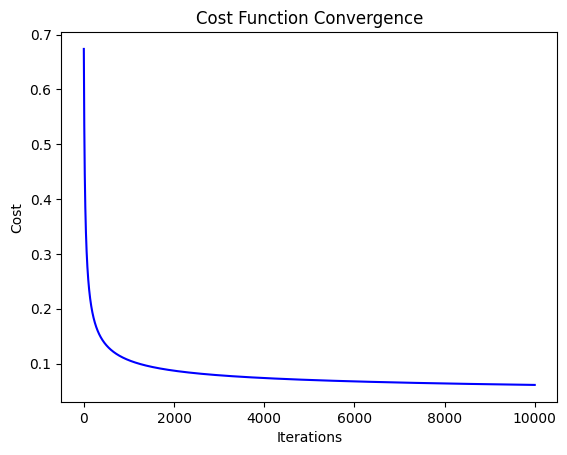

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(len(cost_history)), cost_history, 'b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()
